In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib.colors import ListedColormap

In [2]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

In [3]:
data = pd.read_csv("./data/10_class.csv")
X_train, X_test, y_train, y_test = train_test_split(data[["x1","x2"]], data[["target"]], test_size = 0.3, random_state = 0)

In [4]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# kernel = rbf

In [5]:
#sigmoid, rbf, poly
sv = svm.SVC(kernel = 'rbf', probability = True)
sv.fit(X_train_std, y_train["target"].values)
y_result = sv.predict(X_test_std)
y_test_result = y_test["target"].values

In [6]:
fake_1 = 0
fake_0 = 0
for i, v in enumerate(sv.predict(X_test_std)):
    if v!= y_test['target'].values[i] and v == 1:
        fake_1+=1
    if v!= y_test['target'].values[i] and v == 0:
        fake_0+=1
#print(fake_1)
#print(fake_0)

In [7]:
confusion_matrix(y_test,y_result, labels= [0,1])

array([[39, 22],
       [19, 49]], dtype=int64)

In [8]:
print(classification_report(y_test,y_result))

             precision    recall  f1-score   support

          0       0.67      0.64      0.66        61
          1       0.69      0.72      0.71        68

avg / total       0.68      0.68      0.68       129



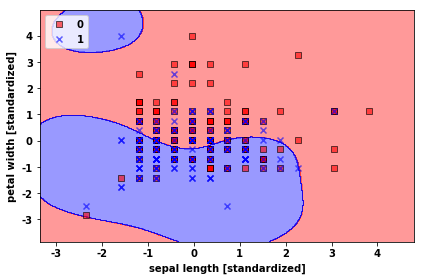

In [9]:
plot_decision_regions(X_train_std, y_train['target'].values, classifier=sv)
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# kernel = sigmoid

In [10]:
#sigmoid, rbf, poly
sv = svm.SVC(kernel = 'sigmoid', probability = True)
sv.fit(X_train_std, y_train["target"].values)
y_result = sv.predict(X_test_std)
y_test_result = y_test["target"].values

In [11]:
fake_1 = 0
fake_0 = 0
for i, v in enumerate(sv.predict(X_test_std)):
    if v!= y_test['target'].values[i] and v == 1:
        fake_1+=1
    if v!= y_test['target'].values[i] and v == 0:
        fake_0+=1
#print(fake_1)
#print(fake_0)

In [12]:
confusion_matrix(y_test,y_result, labels= [0,1])

array([[30, 31],
       [33, 35]], dtype=int64)

In [13]:
print(classification_report(y_test,y_result))

             precision    recall  f1-score   support

          0       0.48      0.49      0.48        61
          1       0.53      0.51      0.52        68

avg / total       0.50      0.50      0.50       129



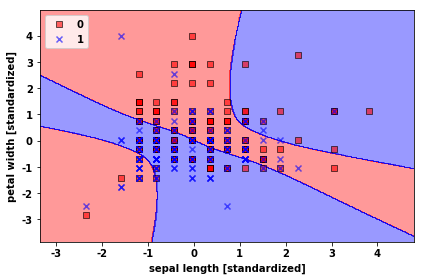

In [14]:
plot_decision_regions(X_train_std, y_train['target'].values, classifier=sv)
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()